Convolutional Dictionary Learning
=================================

This example demonstrates the use of [admm.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.cbpdndl.html#sporco.admm.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of training images. The dictionary learning algorithm is based on the ADMM consensus dictionary update [[42]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[15]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import cbpdndl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 200,
                            'CBPDN': {'rho': 50.0*lmbda + 0.5},
                            'CCMOD': {'rho': 10.0, 'ZeroMean': True}},
                            method='cns')

Create solver object and solve.

In [6]:
d = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt, method='cns')
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D       
--------------------------------------------------------------------------------------------------------


   0  1.03e+03  1.21e+01  5.10e+03  5.93e-07  1.00e+00  4.75e-03  1.05e+01  9.99e-02  6.20e-02  1.00e+01


   1  7.94e+02  7.05e+01  3.62e+03  8.40e-07  9.73e-01  5.86e-02  1.05e+01  5.42e-02  1.39e-01  1.00e+01


   2  6.40e+02  1.32e+02  2.54e+03  7.07e-07  7.71e-01  1.22e-01  1.05e+01  8.23e-02  1.61e-01  1.00e+01


   3  5.64e+02  1.66e+02  1.99e+03  7.99e-07  3.37e-01  1.36e-01  1.05e+01  8.57e-02  1.51e-01  1.00e+01


   4  5.49e+02  1.71e+02  1.89e+03  8.51e-07  2.22e-01  1.24e-01  1.05e+01  7.03e-02  1.27e-01  1.00e+01


   5  5.52e+02  1.61e+02  1.95e+03  7.67e-07  1.71e-01  1.11e-01  1.05e+01  6.01e-02  1.05e-01  1.00e+01


   6  5.42e+02  1.47e+02  1.98e+03  7.46e-07  1.41e-01  9.11e-02  1.05e+01  5.39e-02  8.90e-02  1.00e+01


   7  5.05e+02  1.36e+02  1.85e+03  6.99e-07  1.17e-01  7.57e-02  1.05e+01  4.78e-02  7.83e-02  1.00e+01


   8  4.56e+02  1.30e+02  1.63e+03  7.65e-07  9.69e-02  6.74e-02  1.05e+01  4.27e-02  7.14e-02  1.00e+01


   9  4.16e+02  1.27e+02  1.45e+03  7.72e-07  8.16e-02  6.06e-02  1.05e+01  3.83e-02  6.64e-02  1.00e+01


  10  3.93e+02  1.25e+02  1.34e+03  8.72e-07  7.02e-02  5.21e-02  1.05e+01  3.35e-02  6.19e-02  1.00e+01


  11  3.79e+02  1.25e+02  1.27e+03  7.87e-07  6.09e-02  4.47e-02  1.05e+01  2.89e-02  5.74e-02  1.00e+01


  12  3.68e+02  1.25e+02  1.22e+03  7.37e-07  5.31e-02  3.97e-02  1.05e+01  2.51e-02  5.31e-02  1.00e+01


  13  3.60e+02  1.25e+02  1.18e+03  7.94e-07  4.68e-02  3.68e-02  1.05e+01  2.23e-02  4.91e-02  1.00e+01


  14  3.53e+02  1.24e+02  1.14e+03  6.39e-07  4.19e-02  3.47e-02  1.05e+01  2.04e-02  4.58e-02  1.00e+01


  15  3.48e+02  1.24e+02  1.12e+03  7.87e-07  3.80e-02  3.27e-02  1.05e+01  1.89e-02  4.31e-02  1.00e+01


  16  3.44e+02  1.23e+02  1.11e+03  7.52e-07  3.49e-02  3.10e-02  1.05e+01  1.78e-02  4.10e-02  1.00e+01


  17  3.40e+02  1.22e+02  1.09e+03  8.03e-07  3.23e-02  2.96e-02  1.05e+01  1.68e-02  3.93e-02  1.00e+01


  18  3.36e+02  1.21e+02  1.07e+03  7.19e-07  3.01e-02  2.83e-02  1.05e+01  1.59e-02  3.79e-02  1.00e+01


  19  3.31e+02  1.20e+02  1.06e+03  6.99e-07  2.82e-02  2.73e-02  1.05e+01  1.52e-02  3.67e-02  1.00e+01


  20  3.28e+02  1.19e+02  1.04e+03  7.51e-07  2.66e-02  2.64e-02  1.05e+01  1.45e-02  3.56e-02  1.00e+01


  21  3.25e+02  1.19e+02  1.03e+03  7.72e-07  2.53e-02  2.55e-02  1.05e+01  1.39e-02  3.46e-02  1.00e+01


  22  3.22e+02  1.18e+02  1.02e+03  6.75e-07  2.41e-02  2.46e-02  1.05e+01  1.33e-02  3.36e-02  1.00e+01


  23  3.19e+02  1.18e+02  1.01e+03  9.11e-07  2.30e-02  2.39e-02  1.05e+01  1.28e-02  3.27e-02  1.00e+01


  24  3.17e+02  1.17e+02  9.98e+02  6.63e-07  2.21e-02  2.32e-02  1.05e+01  1.24e-02  3.19e-02  1.00e+01


  25  3.15e+02  1.17e+02  9.90e+02  7.78e-07  2.12e-02  2.25e-02  1.05e+01  1.19e-02  3.10e-02  1.00e+01


  26  3.13e+02  1.16e+02  9.83e+02  7.49e-07  2.04e-02  2.19e-02  1.05e+01  1.16e-02  3.02e-02  1.00e+01


  27  3.11e+02  1.16e+02  9.77e+02  8.38e-07  1.96e-02  2.13e-02  1.05e+01  1.12e-02  2.94e-02  1.00e+01


  28  3.10e+02  1.16e+02  9.71e+02  7.93e-07  1.89e-02  2.09e-02  1.05e+01  1.09e-02  2.87e-02  1.00e+01


  29  3.08e+02  1.15e+02  9.65e+02  7.37e-07  1.83e-02  2.03e-02  1.05e+01  1.05e-02  2.81e-02  1.00e+01


  30  3.07e+02  1.15e+02  9.59e+02  7.53e-07  1.77e-02  1.98e-02  1.05e+01  1.03e-02  2.74e-02  1.00e+01


  31  3.05e+02  1.14e+02  9.54e+02  6.58e-07  1.71e-02  1.94e-02  1.05e+01  9.97e-03  2.69e-02  1.00e+01


  32  3.04e+02  1.14e+02  9.49e+02  6.80e-07  1.66e-02  1.90e-02  1.05e+01  9.73e-03  2.63e-02  1.00e+01


  33  3.02e+02  1.14e+02  9.44e+02  7.56e-07  1.61e-02  1.86e-02  1.05e+01  9.49e-03  2.58e-02  1.00e+01


  34  3.01e+02  1.13e+02  9.39e+02  7.23e-07  1.57e-02  1.82e-02  1.05e+01  9.28e-03  2.53e-02  1.00e+01


  35  3.00e+02  1.13e+02  9.34e+02  8.49e-07  1.52e-02  1.79e-02  1.05e+01  9.08e-03  2.49e-02  1.00e+01


  36  2.99e+02  1.13e+02  9.30e+02  7.22e-07  1.48e-02  1.75e-02  1.05e+01  8.88e-03  2.45e-02  1.00e+01


  37  2.98e+02  1.12e+02  9.26e+02  8.15e-07  1.44e-02  1.72e-02  1.05e+01  8.68e-03  2.40e-02  1.00e+01


  38  2.97e+02  1.12e+02  9.23e+02  7.38e-07  1.41e-02  1.69e-02  1.05e+01  8.50e-03  2.37e-02  1.00e+01


  39  2.96e+02  1.12e+02  9.19e+02  7.17e-07  1.38e-02  1.66e-02  1.05e+01  8.31e-03  2.33e-02  1.00e+01


  40  2.95e+02  1.12e+02  9.16e+02  7.60e-07  1.34e-02  1.63e-02  1.05e+01  8.14e-03  2.29e-02  1.00e+01


  41  2.94e+02  1.11e+02  9.13e+02  7.46e-07  1.32e-02  1.61e-02  1.05e+01  7.99e-03  2.25e-02  1.00e+01


  42  2.93e+02  1.11e+02  9.10e+02  7.01e-07  1.29e-02  1.58e-02  1.05e+01  7.86e-03  2.22e-02  1.00e+01


  43  2.92e+02  1.11e+02  9.07e+02  7.28e-07  1.26e-02  1.56e-02  1.05e+01  7.72e-03  2.19e-02  1.00e+01


  44  2.91e+02  1.11e+02  9.04e+02  7.32e-07  1.23e-02  1.53e-02  1.05e+01  7.58e-03  2.16e-02  1.00e+01


  45  2.91e+02  1.10e+02  9.01e+02  7.48e-07  1.21e-02  1.51e-02  1.05e+01  7.45e-03  2.13e-02  1.00e+01


  46  2.90e+02  1.10e+02  8.99e+02  7.23e-07  1.18e-02  1.49e-02  1.05e+01  7.33e-03  2.10e-02  1.00e+01


  47  2.89e+02  1.10e+02  8.96e+02  7.60e-07  1.16e-02  1.46e-02  1.05e+01  7.21e-03  2.07e-02  1.00e+01


  48  2.88e+02  1.10e+02  8.94e+02  7.03e-07  1.14e-02  1.44e-02  1.05e+01  7.07e-03  2.04e-02  1.00e+01


  49  2.88e+02  1.10e+02  8.91e+02  7.62e-07  1.12e-02  1.42e-02  1.05e+01  6.95e-03  2.01e-02  1.00e+01


  50  2.87e+02  1.09e+02  8.89e+02  6.68e-07  1.09e-02  1.39e-02  1.05e+01  6.83e-03  1.98e-02  1.00e+01


  51  2.86e+02  1.09e+02  8.86e+02  6.48e-07  1.07e-02  1.37e-02  1.05e+01  6.73e-03  1.95e-02  1.00e+01


  52  2.86e+02  1.09e+02  8.84e+02  8.53e-07  1.05e-02  1.35e-02  1.05e+01  6.63e-03  1.92e-02  1.00e+01


  53  2.85e+02  1.09e+02  8.82e+02  7.87e-07  1.03e-02  1.33e-02  1.05e+01  6.53e-03  1.89e-02  1.00e+01


  54  2.85e+02  1.09e+02  8.80e+02  7.44e-07  1.02e-02  1.32e-02  1.05e+01  6.43e-03  1.87e-02  1.00e+01


  55  2.84e+02  1.08e+02  8.77e+02  7.42e-07  9.98e-03  1.30e-02  1.05e+01  6.33e-03  1.84e-02  1.00e+01


  56  2.83e+02  1.08e+02  8.75e+02  7.29e-07  9.80e-03  1.28e-02  1.05e+01  6.22e-03  1.81e-02  1.00e+01


  57  2.83e+02  1.08e+02  8.73e+02  7.06e-07  9.62e-03  1.26e-02  1.05e+01  6.13e-03  1.79e-02  1.00e+01


  58  2.82e+02  1.08e+02  8.71e+02  7.86e-07  9.47e-03  1.24e-02  1.05e+01  6.04e-03  1.77e-02  1.00e+01


  59  2.82e+02  1.08e+02  8.69e+02  8.05e-07  9.31e-03  1.23e-02  1.05e+01  5.96e-03  1.74e-02  1.00e+01


  60  2.81e+02  1.08e+02  8.67e+02  7.49e-07  9.14e-03  1.21e-02  1.05e+01  5.85e-03  1.72e-02  1.00e+01


  61  2.81e+02  1.08e+02  8.65e+02  8.10e-07  8.99e-03  1.19e-02  1.05e+01  5.77e-03  1.69e-02  1.00e+01


  62  2.80e+02  1.07e+02  8.64e+02  7.79e-07  8.84e-03  1.18e-02  1.05e+01  5.69e-03  1.67e-02  1.00e+01


  63  2.80e+02  1.07e+02  8.62e+02  8.03e-07  8.70e-03  1.16e-02  1.05e+01  5.61e-03  1.65e-02  1.00e+01


  64  2.79e+02  1.07e+02  8.60e+02  8.08e-07  8.57e-03  1.15e-02  1.05e+01  5.53e-03  1.63e-02  1.00e+01


  65  2.79e+02  1.07e+02  8.58e+02  7.60e-07  8.44e-03  1.14e-02  1.05e+01  5.47e-03  1.61e-02  1.00e+01


  66  2.78e+02  1.07e+02  8.57e+02  7.46e-07  8.31e-03  1.12e-02  1.05e+01  5.40e-03  1.59e-02  1.00e+01


  67  2.78e+02  1.07e+02  8.55e+02  7.74e-07  8.18e-03  1.11e-02  1.05e+01  5.33e-03  1.57e-02  1.00e+01


  68  2.77e+02  1.07e+02  8.54e+02  7.03e-07  8.06e-03  1.09e-02  1.05e+01  5.25e-03  1.55e-02  1.00e+01


  69  2.77e+02  1.07e+02  8.52e+02  7.59e-07  7.93e-03  1.08e-02  1.05e+01  5.18e-03  1.53e-02  1.00e+01


  70  2.77e+02  1.07e+02  8.51e+02  8.00e-07  7.81e-03  1.06e-02  1.05e+01  5.10e-03  1.51e-02  1.00e+01


  71  2.76e+02  1.06e+02  8.49e+02  7.73e-07  7.70e-03  1.05e-02  1.05e+01  5.04e-03  1.49e-02  1.00e+01


  72  2.76e+02  1.06e+02  8.48e+02  7.42e-07  7.59e-03  1.04e-02  1.05e+01  4.98e-03  1.48e-02  1.00e+01


  73  2.75e+02  1.06e+02  8.47e+02  6.99e-07  7.49e-03  1.03e-02  1.05e+01  4.93e-03  1.46e-02  1.00e+01


  74  2.75e+02  1.06e+02  8.45e+02  7.69e-07  7.39e-03  1.02e-02  1.05e+01  4.88e-03  1.44e-02  1.00e+01


  75  2.75e+02  1.06e+02  8.44e+02  7.04e-07  7.30e-03  1.01e-02  1.05e+01  4.84e-03  1.43e-02  1.00e+01


  76  2.74e+02  1.06e+02  8.43e+02  7.08e-07  7.21e-03  1.00e-02  1.05e+01  4.79e-03  1.41e-02  1.00e+01


  77  2.74e+02  1.06e+02  8.41e+02  8.45e-07  7.12e-03  9.93e-03  1.05e+01  4.73e-03  1.40e-02  1.00e+01


  78  2.74e+02  1.06e+02  8.40e+02  7.27e-07  7.03e-03  9.81e-03  1.05e+01  4.68e-03  1.38e-02  1.00e+01


  79  2.73e+02  1.06e+02  8.39e+02  8.05e-07  6.94e-03  9.70e-03  1.05e+01  4.62e-03  1.37e-02  1.00e+01


  80  2.73e+02  1.06e+02  8.38e+02  7.18e-07  6.85e-03  9.60e-03  1.05e+01  4.57e-03  1.35e-02  1.00e+01


  81  2.73e+02  1.05e+02  8.37e+02  6.17e-07  6.78e-03  9.52e-03  1.05e+01  4.53e-03  1.34e-02  1.00e+01


  82  2.72e+02  1.05e+02  8.36e+02  7.77e-07  6.70e-03  9.43e-03  1.05e+01  4.49e-03  1.33e-02  1.00e+01


  83  2.72e+02  1.05e+02  8.35e+02  7.67e-07  6.62e-03  9.34e-03  1.05e+01  4.44e-03  1.31e-02  1.00e+01


  84  2.72e+02  1.05e+02  8.34e+02  7.45e-07  6.54e-03  9.26e-03  1.05e+01  4.40e-03  1.30e-02  1.00e+01


  85  2.72e+02  1.05e+02  8.33e+02  7.00e-07  6.46e-03  9.15e-03  1.05e+01  4.35e-03  1.29e-02  1.00e+01


  86  2.71e+02  1.05e+02  8.32e+02  7.92e-07  6.38e-03  9.05e-03  1.05e+01  4.31e-03  1.27e-02  1.00e+01


  87  2.71e+02  1.05e+02  8.31e+02  7.15e-07  6.32e-03  8.98e-03  1.05e+01  4.28e-03  1.26e-02  1.00e+01


  88  2.71e+02  1.05e+02  8.30e+02  6.30e-07  6.25e-03  8.90e-03  1.05e+01  4.23e-03  1.25e-02  1.00e+01


  89  2.71e+02  1.05e+02  8.29e+02  6.86e-07  6.19e-03  8.82e-03  1.05e+01  4.19e-03  1.24e-02  1.00e+01


  90  2.70e+02  1.05e+02  8.28e+02  6.49e-07  6.12e-03  8.75e-03  1.05e+01  4.16e-03  1.22e-02  1.00e+01


  91  2.70e+02  1.05e+02  8.27e+02  8.26e-07  6.05e-03  8.66e-03  1.05e+01  4.11e-03  1.21e-02  1.00e+01


  92  2.70e+02  1.05e+02  8.26e+02  7.71e-07  5.99e-03  8.59e-03  1.05e+01  4.07e-03  1.20e-02  1.00e+01


  93  2.70e+02  1.04e+02  8.25e+02  7.84e-07  5.93e-03  8.55e-03  1.05e+01  4.05e-03  1.19e-02  1.00e+01


  94  2.69e+02  1.04e+02  8.24e+02  7.64e-07  5.88e-03  8.48e-03  1.05e+01  4.02e-03  1.18e-02  1.00e+01


  95  2.69e+02  1.04e+02  8.24e+02  7.06e-07  5.81e-03  8.41e-03  1.05e+01  3.98e-03  1.17e-02  1.00e+01


  96  2.69e+02  1.04e+02  8.23e+02  7.72e-07  5.76e-03  8.35e-03  1.05e+01  3.95e-03  1.16e-02  1.00e+01


  97  2.69e+02  1.04e+02  8.22e+02  8.67e-07  5.70e-03  8.27e-03  1.05e+01  3.92e-03  1.15e-02  1.00e+01


  98  2.68e+02  1.04e+02  8.21e+02  6.94e-07  5.66e-03  8.24e-03  1.05e+01  3.90e-03  1.14e-02  1.00e+01


  99  2.68e+02  1.04e+02  8.20e+02  7.34e-07  5.61e-03  8.19e-03  1.05e+01  3.87e-03  1.13e-02  1.00e+01


 100  2.68e+02  1.04e+02  8.20e+02  8.23e-07  5.56e-03  8.14e-03  1.05e+01  3.85e-03  1.12e-02  1.00e+01


 101  2.68e+02  1.04e+02  8.19e+02  8.24e-07  5.51e-03  8.09e-03  1.05e+01  3.82e-03  1.11e-02  1.00e+01


 102  2.68e+02  1.04e+02  8.18e+02  7.77e-07  5.47e-03  8.01e-03  1.05e+01  3.79e-03  1.10e-02  1.00e+01


 103  2.67e+02  1.04e+02  8.17e+02  7.16e-07  5.42e-03  7.96e-03  1.05e+01  3.76e-03  1.09e-02  1.00e+01


 104  2.67e+02  1.04e+02  8.17e+02  8.04e-07  5.38e-03  7.91e-03  1.05e+01  3.73e-03  1.08e-02  1.00e+01


 105  2.67e+02  1.04e+02  8.16e+02  8.24e-07  5.33e-03  7.88e-03  1.05e+01  3.71e-03  1.07e-02  1.00e+01


 106  2.67e+02  1.04e+02  8.15e+02  6.94e-07  5.29e-03  7.84e-03  1.05e+01  3.69e-03  1.07e-02  1.00e+01


 107  2.67e+02  1.04e+02  8.15e+02  8.42e-07  5.25e-03  7.78e-03  1.05e+01  3.67e-03  1.06e-02  1.00e+01


 108  2.66e+02  1.04e+02  8.14e+02  8.47e-07  5.21e-03  7.73e-03  1.05e+01  3.64e-03  1.05e-02  1.00e+01


 109  2.66e+02  1.04e+02  8.14e+02  7.80e-07  5.17e-03  7.68e-03  1.05e+01  3.62e-03  1.04e-02  1.00e+01


 110  2.66e+02  1.03e+02  8.13e+02  7.99e-07  5.13e-03  7.64e-03  1.05e+01  3.59e-03  1.04e-02  1.00e+01


 111  2.66e+02  1.03e+02  8.12e+02  7.31e-07  5.09e-03  7.60e-03  1.05e+01  3.57e-03  1.03e-02  1.00e+01


 112  2.66e+02  1.03e+02  8.12e+02  7.20e-07  5.05e-03  7.55e-03  1.05e+01  3.54e-03  1.02e-02  1.00e+01


 113  2.66e+02  1.03e+02  8.11e+02  7.01e-07  5.02e-03  7.51e-03  1.05e+01  3.52e-03  1.01e-02  1.00e+01


 114  2.65e+02  1.03e+02  8.11e+02  8.16e-07  4.98e-03  7.46e-03  1.05e+01  3.50e-03  1.01e-02  1.00e+01


 115  2.65e+02  1.03e+02  8.10e+02  7.94e-07  4.94e-03  7.41e-03  1.05e+01  3.47e-03  1.00e-02  1.00e+01


 116  2.65e+02  1.03e+02  8.09e+02  6.40e-07  4.90e-03  7.38e-03  1.05e+01  3.45e-03  9.93e-03  1.00e+01


 117  2.65e+02  1.03e+02  8.09e+02  8.53e-07  4.87e-03  7.34e-03  1.05e+01  3.44e-03  9.86e-03  1.00e+01


 118  2.65e+02  1.03e+02  8.08e+02  8.64e-07  4.84e-03  7.30e-03  1.05e+01  3.42e-03  9.79e-03  1.00e+01


 119  2.65e+02  1.03e+02  8.08e+02  8.55e-07  4.81e-03  7.26e-03  1.05e+01  3.40e-03  9.73e-03  1.00e+01


 120  2.64e+02  1.03e+02  8.07e+02  7.59e-07  4.77e-03  7.23e-03  1.05e+01  3.38e-03  9.66e-03  1.00e+01


 121  2.64e+02  1.03e+02  8.07e+02  8.57e-07  4.74e-03  7.17e-03  1.05e+01  3.35e-03  9.60e-03  1.00e+01


 122  2.64e+02  1.03e+02  8.06e+02  7.28e-07  4.69e-03  7.13e-03  1.05e+01  3.33e-03  9.53e-03  1.00e+01


 123  2.64e+02  1.03e+02  8.06e+02  7.58e-07  4.67e-03  7.09e-03  1.05e+01  3.31e-03  9.47e-03  1.00e+01


 124  2.64e+02  1.03e+02  8.05e+02  7.18e-07  4.63e-03  7.06e-03  1.05e+01  3.30e-03  9.40e-03  1.00e+01


 125  2.64e+02  1.03e+02  8.05e+02  7.83e-07  4.61e-03  7.02e-03  1.05e+01  3.28e-03  9.34e-03  1.00e+01


 126  2.64e+02  1.03e+02  8.04e+02  6.27e-07  4.58e-03  7.00e-03  1.05e+01  3.27e-03  9.28e-03  1.00e+01


 127  2.63e+02  1.03e+02  8.04e+02  7.08e-07  4.55e-03  6.97e-03  1.05e+01  3.25e-03  9.22e-03  1.00e+01


 128  2.63e+02  1.03e+02  8.03e+02  8.77e-07  4.51e-03  6.92e-03  1.05e+01  3.23e-03  9.16e-03  1.00e+01


 129  2.63e+02  1.03e+02  8.03e+02  7.11e-07  4.48e-03  6.86e-03  1.05e+01  3.20e-03  9.10e-03  1.00e+01


 130  2.63e+02  1.03e+02  8.02e+02  7.01e-07  4.45e-03  6.81e-03  1.05e+01  3.18e-03  9.03e-03  1.00e+01


 131  2.63e+02  1.03e+02  8.02e+02  7.73e-07  4.42e-03  6.78e-03  1.05e+01  3.16e-03  8.97e-03  1.00e+01


 132  2.63e+02  1.02e+02  8.01e+02  8.47e-07  4.38e-03  6.74e-03  1.05e+01  3.14e-03  8.90e-03  1.00e+01


 133  2.63e+02  1.02e+02  8.01e+02  7.85e-07  4.35e-03  6.70e-03  1.05e+01  3.12e-03  8.84e-03  1.00e+01


 134  2.62e+02  1.02e+02  8.00e+02  7.46e-07  4.32e-03  6.66e-03  1.05e+01  3.10e-03  8.78e-03  1.00e+01


 135  2.62e+02  1.02e+02  8.00e+02  6.64e-07  4.29e-03  6.61e-03  1.05e+01  3.08e-03  8.72e-03  1.00e+01


 136  2.62e+02  1.02e+02  7.99e+02  8.06e-07  4.26e-03  6.58e-03  1.05e+01  3.06e-03  8.65e-03  1.00e+01


 137  2.62e+02  1.02e+02  7.99e+02  7.45e-07  4.22e-03  6.53e-03  1.05e+01  3.04e-03  8.59e-03  1.00e+01


 138  2.62e+02  1.02e+02  7.98e+02  8.37e-07  4.19e-03  6.50e-03  1.05e+01  3.03e-03  8.53e-03  1.00e+01


 139  2.62e+02  1.02e+02  7.98e+02  7.85e-07  4.16e-03  6.46e-03  1.05e+01  3.01e-03  8.47e-03  1.00e+01


 140  2.62e+02  1.02e+02  7.97e+02  7.83e-07  4.14e-03  6.43e-03  1.05e+01  3.00e-03  8.42e-03  1.00e+01


 141  2.62e+02  1.02e+02  7.97e+02  6.92e-07  4.11e-03  6.40e-03  1.05e+01  2.99e-03  8.36e-03  1.00e+01


 142  2.61e+02  1.02e+02  7.97e+02  7.40e-07  4.09e-03  6.38e-03  1.05e+01  2.97e-03  8.31e-03  1.00e+01


 143  2.61e+02  1.02e+02  7.96e+02  6.90e-07  4.07e-03  6.36e-03  1.05e+01  2.96e-03  8.26e-03  1.00e+01


 144  2.61e+02  1.02e+02  7.96e+02  7.35e-07  4.04e-03  6.34e-03  1.05e+01  2.95e-03  8.21e-03  1.00e+01


 145  2.61e+02  1.02e+02  7.95e+02  9.24e-07  4.02e-03  6.32e-03  1.05e+01  2.94e-03  8.16e-03  1.00e+01


 146  2.61e+02  1.02e+02  7.95e+02  7.93e-07  4.00e-03  6.30e-03  1.05e+01  2.93e-03  8.12e-03  1.00e+01


 147  2.61e+02  1.02e+02  7.94e+02  7.91e-07  3.98e-03  6.26e-03  1.05e+01  2.91e-03  8.07e-03  1.00e+01


 148  2.61e+02  1.02e+02  7.94e+02  8.74e-07  3.96e-03  6.22e-03  1.05e+01  2.90e-03  8.03e-03  1.00e+01


 149  2.61e+02  1.02e+02  7.94e+02  7.96e-07  3.94e-03  6.20e-03  1.05e+01  2.89e-03  7.99e-03  1.00e+01


 150  2.60e+02  1.02e+02  7.93e+02  8.03e-07  3.92e-03  6.18e-03  1.05e+01  2.88e-03  7.94e-03  1.00e+01


 151  2.60e+02  1.02e+02  7.93e+02  8.22e-07  3.90e-03  6.16e-03  1.05e+01  2.87e-03  7.90e-03  1.00e+01


 152  2.60e+02  1.02e+02  7.92e+02  7.25e-07  3.88e-03  6.14e-03  1.05e+01  2.86e-03  7.86e-03  1.00e+01


 153  2.60e+02  1.02e+02  7.92e+02  7.54e-07  3.86e-03  6.11e-03  1.05e+01  2.85e-03  7.82e-03  1.00e+01


 154  2.60e+02  1.02e+02  7.92e+02  7.84e-07  3.84e-03  6.08e-03  1.05e+01  2.83e-03  7.78e-03  1.00e+01


 155  2.60e+02  1.02e+02  7.91e+02  7.84e-07  3.82e-03  6.06e-03  1.05e+01  2.82e-03  7.74e-03  1.00e+01


 156  2.60e+02  1.02e+02  7.91e+02  7.60e-07  3.80e-03  6.03e-03  1.05e+01  2.81e-03  7.70e-03  1.00e+01


 157  2.60e+02  1.02e+02  7.91e+02  7.55e-07  3.78e-03  6.00e-03  1.05e+01  2.80e-03  7.66e-03  1.00e+01


 158  2.60e+02  1.02e+02  7.90e+02  9.00e-07  3.75e-03  5.97e-03  1.05e+01  2.78e-03  7.62e-03  1.00e+01


 159  2.60e+02  1.02e+02  7.90e+02  6.77e-07  3.74e-03  5.94e-03  1.05e+01  2.77e-03  7.58e-03  1.00e+01


 160  2.60e+02  1.02e+02  7.90e+02  7.89e-07  3.72e-03  5.92e-03  1.05e+01  2.76e-03  7.54e-03  1.00e+01


 161  2.59e+02  1.02e+02  7.89e+02  6.62e-07  3.70e-03  5.90e-03  1.05e+01  2.75e-03  7.50e-03  1.00e+01


 162  2.59e+02  1.02e+02  7.89e+02  8.29e-07  3.68e-03  5.87e-03  1.05e+01  2.74e-03  7.46e-03  1.00e+01


 163  2.59e+02  1.01e+02  7.89e+02  7.90e-07  3.67e-03  5.86e-03  1.05e+01  2.73e-03  7.42e-03  1.00e+01


 164  2.59e+02  1.01e+02  7.88e+02  7.02e-07  3.65e-03  5.83e-03  1.05e+01  2.72e-03  7.39e-03  1.00e+01


 165  2.59e+02  1.01e+02  7.88e+02  7.05e-07  3.63e-03  5.81e-03  1.05e+01  2.71e-03  7.35e-03  1.00e+01


 166  2.59e+02  1.01e+02  7.88e+02  8.27e-07  3.61e-03  5.78e-03  1.05e+01  2.69e-03  7.32e-03  1.00e+01


 167  2.59e+02  1.01e+02  7.87e+02  7.40e-07  3.59e-03  5.75e-03  1.05e+01  2.68e-03  7.28e-03  1.00e+01


 168  2.59e+02  1.01e+02  7.87e+02  7.04e-07  3.57e-03  5.72e-03  1.05e+01  2.67e-03  7.25e-03  1.00e+01


 169  2.59e+02  1.01e+02  7.87e+02  8.93e-07  3.55e-03  5.70e-03  1.05e+01  2.66e-03  7.21e-03  1.00e+01


 170  2.59e+02  1.01e+02  7.86e+02  6.24e-07  3.53e-03  5.67e-03  1.05e+01  2.65e-03  7.18e-03  1.00e+01


 171  2.59e+02  1.01e+02  7.86e+02  7.64e-07  3.51e-03  5.66e-03  1.05e+01  2.64e-03  7.14e-03  1.00e+01


 172  2.58e+02  1.01e+02  7.86e+02  7.39e-07  3.49e-03  5.63e-03  1.05e+01  2.63e-03  7.11e-03  1.00e+01


 173  2.58e+02  1.01e+02  7.86e+02  7.67e-07  3.47e-03  5.61e-03  1.05e+01  2.61e-03  7.07e-03  1.00e+01


 174  2.58e+02  1.01e+02  7.85e+02  7.64e-07  3.46e-03  5.59e-03  1.05e+01  2.60e-03  7.04e-03  1.00e+01


 175  2.58e+02  1.01e+02  7.85e+02  7.35e-07  3.44e-03  5.57e-03  1.05e+01  2.60e-03  7.01e-03  1.00e+01


 176  2.58e+02  1.01e+02  7.85e+02  6.98e-07  3.43e-03  5.55e-03  1.05e+01  2.59e-03  6.98e-03  1.00e+01


 177  2.58e+02  1.01e+02  7.84e+02  8.59e-07  3.41e-03  5.53e-03  1.05e+01  2.58e-03  6.95e-03  1.00e+01


 178  2.58e+02  1.01e+02  7.84e+02  9.09e-07  3.40e-03  5.52e-03  1.05e+01  2.57e-03  6.92e-03  1.00e+01


 179  2.58e+02  1.01e+02  7.84e+02  8.58e-07  3.38e-03  5.50e-03  1.05e+01  2.56e-03  6.89e-03  1.00e+01


 180  2.58e+02  1.01e+02  7.83e+02  7.82e-07  3.38e-03  5.47e-03  1.05e+01  2.55e-03  6.86e-03  1.00e+01


 181  2.58e+02  1.01e+02  7.83e+02  8.23e-07  3.36e-03  5.45e-03  1.05e+01  2.54e-03  6.83e-03  1.00e+01


 182  2.58e+02  1.01e+02  7.83e+02  7.61e-07  3.35e-03  5.44e-03  1.05e+01  2.53e-03  6.80e-03  1.00e+01


 183  2.58e+02  1.01e+02  7.83e+02  7.62e-07  3.33e-03  5.42e-03  1.05e+01  2.53e-03  6.77e-03  1.00e+01


 184  2.57e+02  1.01e+02  7.82e+02  7.22e-07  3.32e-03  5.41e-03  1.05e+01  2.52e-03  6.74e-03  1.00e+01


 185  2.57e+02  1.01e+02  7.82e+02  7.93e-07  3.30e-03  5.38e-03  1.05e+01  2.51e-03  6.71e-03  1.00e+01


 186  2.57e+02  1.01e+02  7.82e+02  8.19e-07  3.29e-03  5.36e-03  1.05e+01  2.50e-03  6.68e-03  1.00e+01


 187  2.57e+02  1.01e+02  7.82e+02  7.50e-07  3.28e-03  5.33e-03  1.05e+01  2.49e-03  6.65e-03  1.00e+01


 188  2.57e+02  1.01e+02  7.81e+02  9.82e-07  3.26e-03  5.30e-03  1.05e+01  2.48e-03  6.62e-03  1.00e+01


 189  2.57e+02  1.01e+02  7.81e+02  8.61e-07  3.25e-03  5.29e-03  1.05e+01  2.47e-03  6.59e-03  1.00e+01


 190  2.57e+02  1.01e+02  7.81e+02  8.49e-07  3.23e-03  5.28e-03  1.05e+01  2.47e-03  6.56e-03  1.00e+01


 191  2.57e+02  1.01e+02  7.81e+02  7.37e-07  3.22e-03  5.26e-03  1.05e+01  2.46e-03  6.53e-03  1.00e+01


 192  2.57e+02  1.01e+02  7.80e+02  8.03e-07  3.21e-03  5.24e-03  1.05e+01  2.45e-03  6.51e-03  1.00e+01


 193  2.57e+02  1.01e+02  7.80e+02  7.06e-07  3.19e-03  5.23e-03  1.05e+01  2.45e-03  6.48e-03  1.00e+01


 194  2.57e+02  1.01e+02  7.80e+02  7.41e-07  3.18e-03  5.21e-03  1.05e+01  2.44e-03  6.45e-03  1.00e+01


 195  2.57e+02  1.01e+02  7.80e+02  7.77e-07  3.17e-03  5.19e-03  1.05e+01  2.43e-03  6.43e-03  1.00e+01


 196  2.57e+02  1.01e+02  7.79e+02  7.94e-07  3.15e-03  5.18e-03  1.05e+01  2.42e-03  6.40e-03  1.00e+01


 197  2.57e+02  1.01e+02  7.79e+02  9.49e-07  3.14e-03  5.16e-03  1.05e+01  2.42e-03  6.37e-03  1.00e+01


 198  2.56e+02  1.01e+02  7.79e+02  8.37e-07  3.12e-03  5.13e-03  1.05e+01  2.40e-03  6.35e-03  1.00e+01


 199  2.56e+02  1.01e+02  7.79e+02  8.03e-07  3.11e-03  5.10e-03  1.05e+01  2.39e-03  6.32e-03  1.00e+01
--------------------------------------------------------------------------------------------------------
ConvBPDNDictLearn solve time: 123.33s


Display initial and final dictionaries.

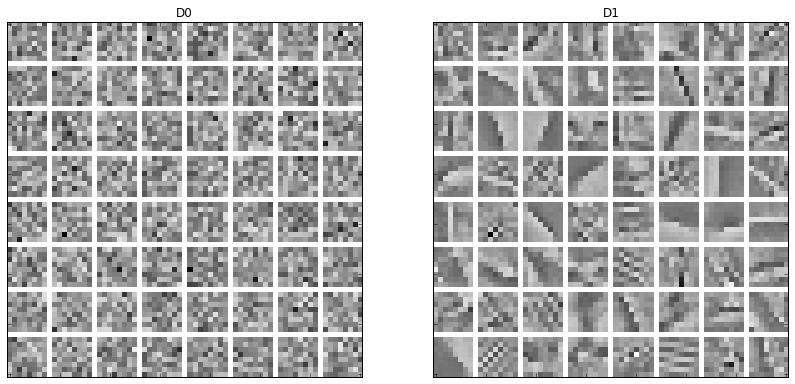

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), fig=fig, title='D0')
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), fig=fig, title='D1')
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

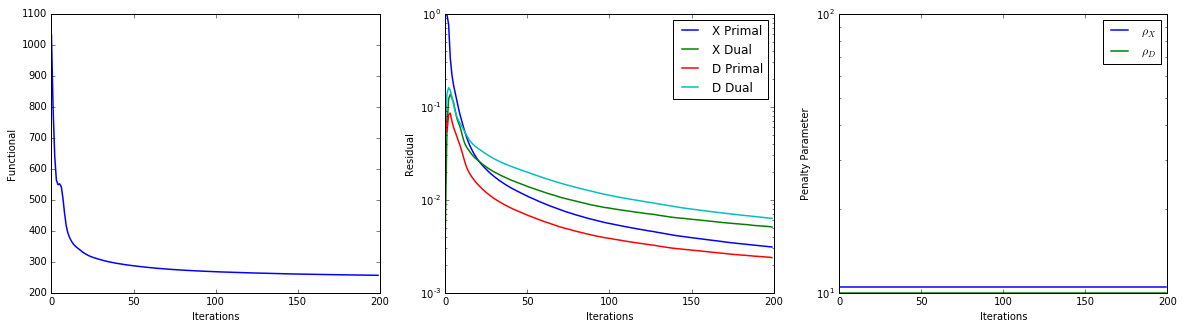

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fig=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
          its.DDlRsdl)).T, fig=fig, ptyp='semilogy', xlbl='Iterations',
          ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'])
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.XRho, its.DRho)).T, fig=fig, xlbl='Iterations',
          ylbl='Penalty Parameter', ptyp='semilogy',
          lgnd=['$\\rho_X$', '$\\rho_D$'])
fig.show()